## Analysis of Netflix Viewing History

In [1]:

import matplotlib as mlt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime
sns.set()

In [2]:
df = pd.read_csv('NetflixViewingHistory.csv')

In [3]:
df.head()

,Title,Date
0,You Me Her: Season 4: The Deaf Leading the Bli...,26/10/2020
1,You Me Her: Season 4: The Saddest Clown Show Ever,25/10/2020
2,"You Me Her: Season 4: Triangular Peg, Meet Rou...",25/10/2020
3,Over the Moon,25/10/2020
4,Rebecca,24/10/2020


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'], df['Month'] = df['Date'].dt.year, df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Day_of_week'] = df['Date'].dt.day_name()

In [5]:
show_details = df.Title.str.split(":",expand=True,n=2)
#show_details
df['show_name'] = show_details[0]
df['season'] = show_details[1]
df['episode_name'] = show_details[2]

In [6]:
#If the season column is "None" them it is most likely a movie, lets add another column to our dataframe 
#my_history[my_history['season'].isna()]
df['show_type'] = df.apply(lambda x:'Movie' if pd.isnull(x['season']) else 'TV Show' , axis=1)
df

,Title,Date,Year,Month,Day,Day_of_week,show_name,season,episode_name,show_type
0,You Me Her: Season 4: The Deaf Leading the Bli...,2020-10-26,2020,October,26,Monday,You Me Her,Season 4,The Deaf Leading the Blind Leading the Stupid,TV Show
1,You Me Her: Season 4: The Saddest Clown Show Ever,2020-10-25,2020,October,25,Sunday,You Me Her,Season 4,The Saddest Clown Show Ever,TV Show
2,"You Me Her: Season 4: Triangular Peg, Meet Rou...",2020-10-25,2020,October,25,Sunday,You Me Her,Season 4,"Triangular Peg, Meet Round Hole",TV Show
3,Over the Moon,2020-10-25,2020,October,25,Sunday,Over the Moon,None,None,Movie
4,Rebecca,2020-10-24,2020,October,24,Saturday,Rebecca,None,None,Movie
...,...,...,...,...,...,...,...,...,...,...
515,Ashley Garcia: Genius in Love: Part 2: Uninten...,2020-07-20,2020,July,20,Monday,Ashley Garcia,Genius in Love,Part 2: Unintended Consequences,TV Show
516,Ashley Garcia: Genius in Love: Part 2: Failure...,2020-07-20,2020,July,20,Monday,Ashley Garcia,Genius in Love,Part 2: Failure Is Not an Option,TV Show
517,Ashley Garcia: Genius in Love: Part 2: In Tad ...,2020-07-20,2020,July,20,Monday,Ashley Garcia,Genius in Love,Part 2: In Tad We Trust,TV Show
518,Larva Island: Season 1: Mango,2020-07-19,2020,July,19,Sunday,Larva Island,Season 1,Mango,TV Show


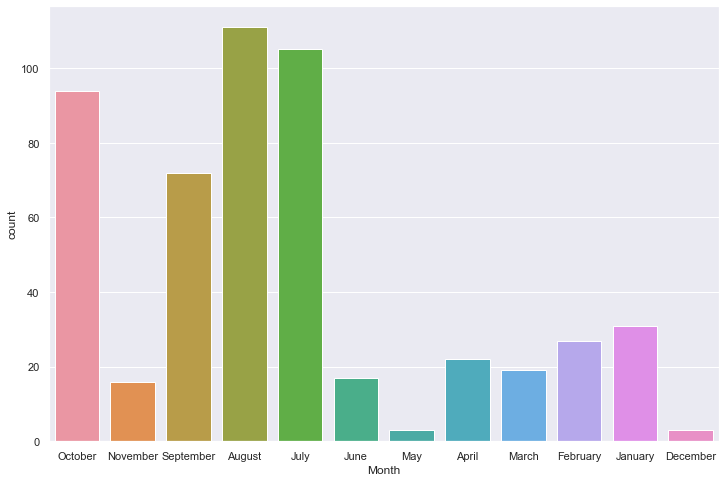

In [40]:
plt.figure(figsize = (12, 8)) 
sns.countplot(x = 'Month', data = df)

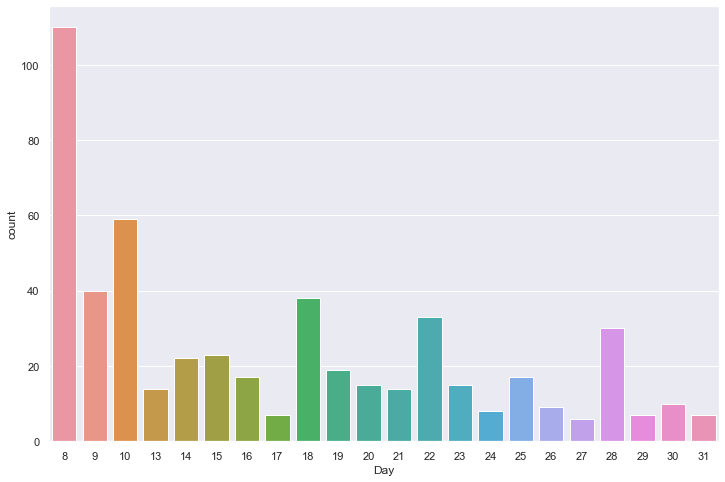

In [17]:
plt.figure(figsize = (12, 8)) 
sns.countplot(x = 'Day', data = df)

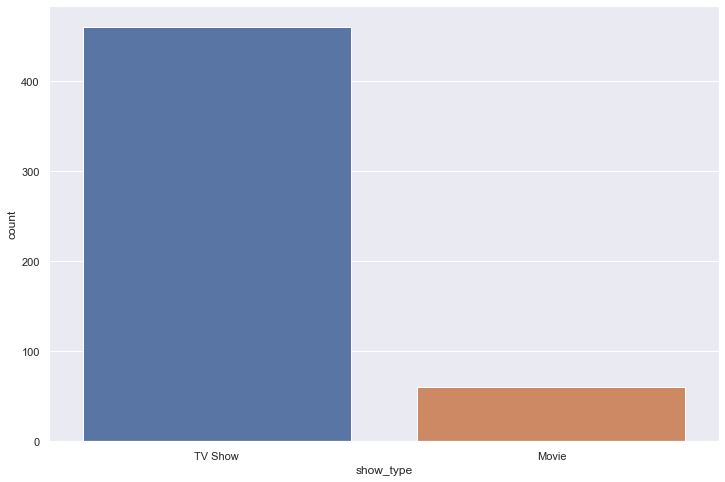

In [18]:
plt.figure(figsize = (12, 8)) 
sns.countplot(x = 'show_type', data = df)

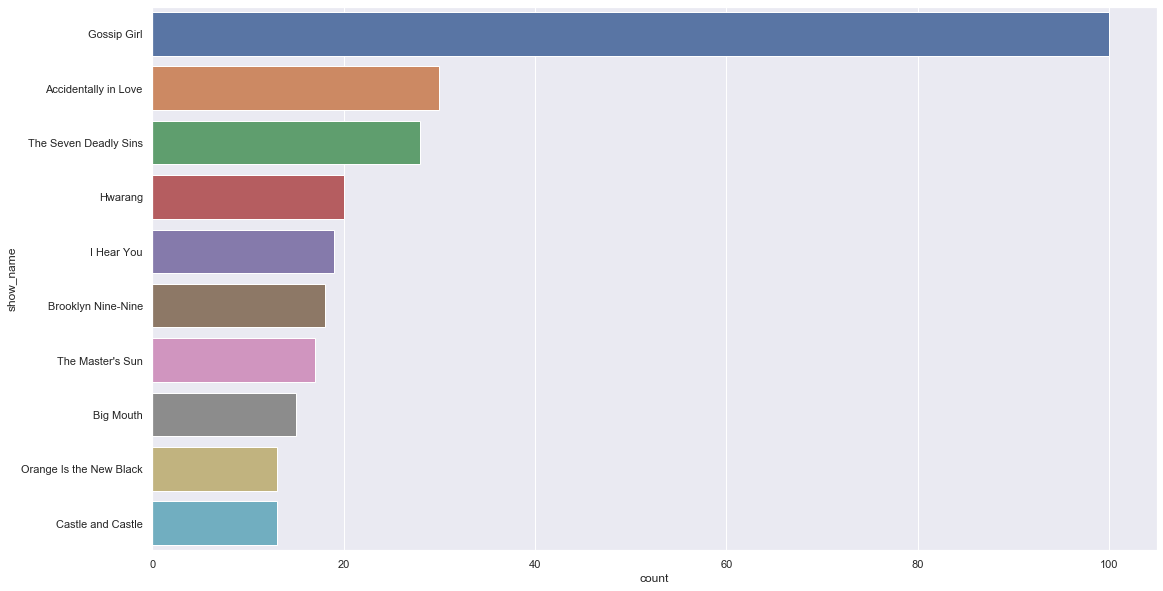

In [37]:
plt.figure(figsize = (18, 10)) 
sns.countplot(y = 'show_name', data = df, order=df['show_name'].value_counts().iloc[:10].index)

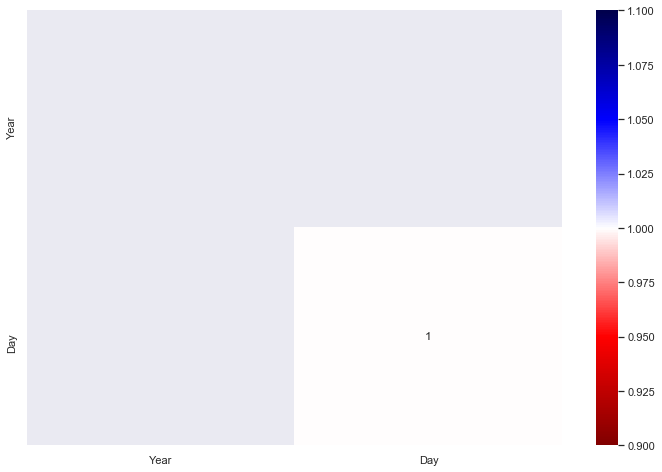

In [31]:
plt.figure(figsize = (12, 8))
ax=sns.heatmap(data=df.corr(), annot = True, cmap='seismic_r')